**Данный проект называется WEBmedSTAT.**

**Целью данного исследования является визуализация статистических данных в области здравоохранения, отображающих динамику за 22 года (с 2001 по 2023 год). В ходе работы проверяются социально значимые гипотезы, выдвинутые Заказчиком (тема конкретного исследования - "занятость и оплата труда в здравоохранении"). Конечная целевая аудитория – медицинские чиновники и руководители органов управления здравоохранением Российской Федерации.** 

**Источник данных - оцифрованные аналитические сборники Росстата "Здравоохранение в России" за период с 2001 по 2023 год.**

**В ходе данной работы были выдвинуты некоторые гипотезы и даны ответы на следующие вопросы:**

***1. Подтверждаются ли предположения о том, что за исследуемый период динамика роста средней заработной платы работников здравоохранения составляет порядка 10 %.***

***2. Подтверждаются ли предположения о том, что количество хирургов в стране растёт, а количество педиатров снижается.***

***3. Сокращается ли число педиатров на 10 тысяч детей до 18 лет?***

**Используемые отчёты Росстата из вышеупомянутого сборника "Здравоохранение в России":**

***- 4.5 "Среднемесячная номинальная  заработная плата работников в организациях здравоохранения, по формам собственности",***

***-4.9 "Распределение численности врачей по отдельным специальностям".*** 


**Ссылка на дашборд DataLens - https://datalens.yandex/6sm3r5keokp4u**

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import os
from glob import glob
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 1. Гипотеза N 1 - подтверждаются ли предположения о том, что за исследуемый период с 2001 по 2023 год динамика роста средней заработной платы работников здравоохранения составляет порядка 10 %.

Проверяемая гипотеза:

H0: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов равна 10 %.

H1: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов не равна 10 %.

Используются данные из отчёта 4.5 "Среднемесячная номинальная заработная плата работников в организациях здравоохранения, по формам собственности" в разрезе указанных годов.
 
В ходе парсинга сайта Росстата были получены файлы, требующие некоторой предобработки - объединение таблиц, изменение названий колонок, работа с пропусками и т.п.

Так, например, при работе с отчётом 4.5 "Среднемесячная номинальная заработная плата работников в организациях здравоохранения, по формам собственности" были получены несколько файлов, каждый из которых содержит в себе информацию за некоторый период (от 2 до 5 лет - например, с 2021 по 2022 год, или с 2010 по 2014 годы).В совокупности данные в файлах охватывают период с 2001 по 2023 год, однако данные за какие-то годы в некоторых файлах дублируются. Т.е., например, данные за 2005 год могут содержаться сразу в нескольких файлах. Таким образом, для дальнейшего анализа в первую очередь необходимо объединить данные из файлов в одну таблицу в хронологическом порядке с 2001 по 2023 год.

In [2]:
# Образец данных (файл за период с 2000 по 2004 год)
data = pd.read_csv('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Средняя зарплата по формам собственности//2005_среднемесячная номинальная начисленная заработная плата работников организаций медицинской промышленности по формам собственности.csv', on_bad_lines='skip', sep=';')

In [3]:
data

,4.7. СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ОРГАНИЗАЦИЙ ОТРАСЛИ «ЗДРАВООХРАНЕНИЕ» ПО ФОРМАМ СОБСТВЕННОСТИ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,2000,2001,2002,2003,2004
1,"Всего, руб","1370,9",2004,"3225,3","3754,9","4736,2"
2,По формам собственности:,NaN,NaN,NaN,NaN,NaN
3,государственная,"1430,5","2096,2","3404,6","4176,6","5347,8"
4,муниципальная,"1242,6","1832,3","3018,8","3255,1","4053,2"
5,частная,"1532,2",2169,"3379,4","4306,3","5265,9"
6,собственность общественных и религиозных организаций (объединений),1848,"2630,2","3128,1","4087,4","4896,7"
7,смешанная российская,"2234,1","3150,3","4271,2","5438,3","7103,8"
8,"иностранная, совместная российская и иностранная","2459,6","3647,4","4865,1","6465,6","8300,5"
9,NaN,В процентах к среднеотраслевому уровню,NaN,NaN,NaN,NaN


In [4]:
# Изменим название колонок с индекса 0,1,2,... на номер года
data.columns = data.iloc[0]

# Также назовём первый столбец как Показатель c указанием валюты исчисления данных (в рублях)
data.columns.values[0] = 'Показатель, в рублях'

# Обработаем пропуск в строке с индексом 9 по колонке "Показатель" - заменим NaN на "Изменения"
data.loc[9, 'Показатель, в рублях'] = 'Изменения'

# Обработаем пропуск в строке с индексом 9 по колонкам с 2001 по 2004 - вставим пропущенное по смыслу значение
data.iloc[9, 2:] = 'В процентах к среднеотраслевому уровню'

# Удалим нулевую строку (дублирует название года) и обработаем пропуски в строках с индексами 3 и 12 
# (по формам собственности) - удалим эти строки, т.к. они не содержит данных  
data = data.drop(index= [0,2,11]).reset_index(drop=True)

In [5]:
data

,"Показатель, в рублях",2000,2001,2002,2003,2004
0,"Всего, руб","1370,9",2004,"3225,3","3754,9","4736,2"
1,государственная,"1430,5","2096,2","3404,6","4176,6","5347,8"
2,муниципальная,"1242,6","1832,3","3018,8","3255,1","4053,2"
3,частная,"1532,2",2169,"3379,4","4306,3","5265,9"
4,собственность общественных и религиозных организаций (объединений),1848,"2630,2","3128,1","4087,4","4896,7"
5,смешанная российская,"2234,1","3150,3","4271,2","5438,3","7103,8"
6,"иностранная, совместная российская и иностранная","2459,6","3647,4","4865,1","6465,6","8300,5"
7,Изменения,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню
8,Всего,100,100,100,100,100
9,государственная,"104,3","104,6","105,6","111,2","112,9"


In [6]:
# Зададим директорию папки, в которой хранятся csv файлы в разрезе годов
os.chdir('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Средняя зарплата по формам собственности')

In [7]:
# Проверим имена файлов, хранящихся в папке. Данные файлы необходимо объединить по годам.
csvs = []
for f in glob('*.csv'):
    csvs.append(f)
csvs

['2005_среднемесячная номинальная начисленная заработная плата работников организаций медицинской промышленности по формам собственности.csv',
 '2007_среднемесячная номинальная начисленная заработная плата работников организаций здравоохранения по формам собственности.csv',
 '2009_среднемесячная номинальная начисленная заработная плата работни-ков здравоохранения в организациях по формам собственности.csv',
 '2011_среднемесячная номинальная начисленная заработная плата работни-ков здравоохранения в организациях по формам собственности.csv',
 '2013_среднемесячная номинальная начисленная заработная плата работников здравоохранения в организациях по формам собственности.csv',
 '2015_среднемесячная номинальная начисленная заработная плата работников здравоохранения в организациях по формам собственности.csv',
 '2017_среднемесячная номинальная начисленная заработная плата работников здравоохранения в организациях по формам собственности.csv',
 '2019_среднемесячная номинальная начисленная за

In [8]:
# Колонки, по которым будет происходить объединение файлов
cols_to_join = list(data.columns[:])
cols_to_join

['Показатель, в рублях', '2000', '2001', '2002', '2003', '2004']

**Сначала объединим данные с 2005 по 2011 год. Т.к. в данных файлах название колонок заданы индексами, а не годами. В последующих файлах название колонок указаны уже в виде годов.**

In [9]:
# Зададим цикл для присоединения к data трёх файлов (2007-2011 годы)
for f in csvs[1:4]:
    
    # Загружаем файл из папки
    tmpdf = pd.read_csv(f"C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Средняя зарплата по формам собственности//{f}")
    
    # Изменим название колонок с индекса 0,1,2,... на номер года
    tmpdf.columns = tmpdf.iloc[0]

    # Также назовём первый столбец как Показатель c указанием валюты исчисления данных (в рублях)
    tmpdf.columns.values[0] = 'Показатель, в рублях'
    
    # Обработаем пропуск в строке с индексом 10 по колонке "Показатель" - заменим NaN на "Изменения"
    tmpdf.loc[10, 'Показатель, в рублях'] = 'Изменения'

    # Удалим нулевую строку (дублирует название года), первую строку (с указание валюты) и обработаем пропуски в строках
    # с индексами 3 и 12 (по формам собственности) - удалим эти строки, т.к. они не содержит данных
    tmpdf = tmpdf.drop(index= [0, 1, 3, 12]).reset_index(drop=True)
    
    #Удалим столбцы для тех лет в случае, если столбец с таким годом уже есть в предыдущей таблице для цикла. Т.о., мы 
    # избавимся от дублированных столбцов
    
    for elem in list(tmpdf.columns[1:]):
        if elem in cols_to_join:
            tmpdf = tmpdf.drop(elem, axis=1)
    
    # Добавим два последних столбца в список cols_to_join - т.к. это необходимые для объединения столбцы; два 
    # столбца - это искомые годы, которые нужно присоединить к data
    cols_to_join.extend(tmpdf.columns[-2:])
    
    # Объединим датафреймы
    data = pd.concat([data, tmpdf.iloc[:,1:]], axis=1)

**Теперь присоединим оставшиеся данные в формате csv с 2011 по 2020 год. В данных файлах название колонок заданы годами. Поэтому цикл скорректирован на это условие.**

In [10]:
# Зададим цикл для присоединения к data оставшихся csv файлов (2011-2020 годы)
for f in csvs[4:]:
    
    # Загружаем файл из папки
    tmpdf = pd.read_csv(f"C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Средняя зарплата по формам собственности//{f}")
    
    # Назовём первый столбец как Показатель c указанием валюты исчисления данных (в рублях)
    tmpdf.columns.values[0] = 'Показатель, в рублях'
    
    # Обработаем пропуск в строке с индексом 9 по колонке "Показатель" - заменим NaN на "Изменения"
    tmpdf.loc[9, 'Показатель, в рублях'] = 'Изменения'

    # Удалим нулевую строку (с указание валюты) и обработаем пропуски в строках с индексами 2 и 11 (по формам собственности) - 
    # удалим эти строки, т.к. они не содержит данных
    tmpdf = tmpdf.drop(index= [0, 2, 11]).reset_index(drop=True)
    
    #Удалим столбцы для тех лет в случае, если столбец с таким годом уже есть в предыдущей таблице для цикла. Т.о., мы 
    # избавимся от дублированных столбцов
    
    for elem in list(tmpdf.columns[1:]):
        if elem in cols_to_join:
            tmpdf = tmpdf.drop(elem, axis=1)
    
    # Добавим два последних столбца в список cols_to_join - т.к. это необходимые для объединения столбцы; два 
    # столбца - это искомые годы, которые нужно присоединить к data
    cols_to_join.extend(tmpdf.columns[-2:])
    
    # Объединим датафреймы
    data = pd.concat([data, tmpdf.iloc[:,1:]], axis=1)

In [11]:
data

,"Показатель, в рублях",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,20141),2015,2016,2017,2018,2019,2020
0,"Всего, руб","1370,9",2004,"3225,3","3754,9","4736,2",5905.6,8059.9,10037,13049,14820,15724,17545,20641,24439,27068,27068,28179,29742,31980,40027,43 122,49 532
1,государственная,"1430,5","2096,2","3404,6","4176,6","5347,8",6602.7,9007.7,11138,14831,17284,18407,19615,21724,25139,27640,27640,28699,30266,32528,41213,44 130,51 061
2,муниципальная,"1242,6","1832,3","3018,8","3255,1","4053,2",5171.5,7113.0,8789,11102,12299,12761,14717,17727,22123,24405,24405,22616,23157,24948,30867,33 104,37 266
3,частная,"1532,2",2169,"3379,4","4306,3","5265,9",6844.4,8638.9,11482,14848,15514,18252,18409,20564,21219,23550,23550,26316,27118,29385,33754,36 870,41 110
4,собственность общественных и религиозных организаций (объединений),1848,"2630,2","3128,1","4087,4","4896,7",6101.4,7683.8,9571,11714,13651,13978,15547,18233,19404,21380,21380,23347,25198,26026,29286,31 975,32 723
5,смешанная российская,"2234,1","3150,3","4271,2","5438,3","7103,8",7499.6,9142.7,10775,13086,14298,15523,18456,20959,23733,26355,26355,28548,27865,29665,35203,38 290,38 894
6,"иностранная, совместная российская и иностранная","2459,6","3647,4","4865,1","6465,6","8300,5",11976.3,15026.2,20077,27149,28298,34376,36972,42930,50536,60145,60145,58983,64142,71380,74445,79 411,76 320
7,Изменения,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению
8,Всего,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
9,государственная,"104,3","104,6","105,6","111,2","112,9",111.8,111.8,111.0,113.7,116.6,117.1,112,105,103,102,102,102,102,"101,7","103,0","102,3","103,1"


**В одном из файлов колонка с 2014 годом была названа как "20141)", поэтому данные за этот год дублированы - удалим колонку с названием "20141)", оставим только одну колонку с годом "2014". Кроме того, присоединим к data данные из файла в формате excel за 2021 и 2022 годы (колонки указаны по индексам, требуется переименование колонок, удаление строк с годами и валютой).**

In [12]:
# Удалим столбец 20141)
data.drop('20141)', axis =1, inplace = True)

In [13]:
# датасет за 2021 и 2022 годы
data_excel = pd.read_excel('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//WEBmedSTAT//2023//Zdrav_04-2023.xlsx', sheet_name = 5)

In [14]:
# Изменим название колонок с индекса 0,1,2,... на номер года
data_excel.columns = data_excel.iloc[0]

# Также назовём первый столбец как Показатель c указанием валюты исчисления данных (в рублях)
data_excel.columns.values[0] = 'Показатель, в рублях'

# Обработаем пропуск в строке с индексом 9 по колонке "Показатель" - заменим NaN на "Изменения"
data_excel.loc[9, 'Показатель, в рублях'] = 'Изменения'

# Обработаем пропуск в строке с индексом 9 по колонке "2022" - вставим пропущенное по смыслу значение
data_excel.iloc[9, 2] = 'В процентах \nк среднемесячной заработной плате в целом по здравоохранению'

# Удалим нулевую строку (дублирует название года) и первую строку (с указание валюты)
data_excel = data_excel.drop(index= [0,1]).reset_index(drop=True)

In [15]:
# Объединим датафреймы
data = pd.concat([data, data_excel.iloc[:,1:]], axis=1)

In [16]:
data

,"Показатель, в рублях",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Всего, руб","1370,9",2004,"3225,3","3754,9","4736,2",5905.6,8059.9,10037,13049,14820,15724,17545,20641,24439,27068,28179,29742,31980,40027,43 122,49 532,50 690,55 420
1,государственная,"1430,5","2096,2","3404,6","4176,6","5347,8",6602.7,9007.7,11138,14831,17284,18407,19615,21724,25139,27640,28699,30266,32528,41213,44 130,51 061,51 548,56 175
2,муниципальная,"1242,6","1832,3","3018,8","3255,1","4053,2",5171.5,7113.0,8789,11102,12299,12761,14717,17727,22123,24405,22616,23157,24948,30867,33 104,37 266,33 527,37 894
3,частная,"1532,2",2169,"3379,4","4306,3","5265,9",6844.4,8638.9,11482,14848,15514,18252,18409,20564,21219,23550,26316,27118,29385,33754,36 870,41 110,46 261,53 041
4,собственность общественных и религиозных организаций (объединений),1848,"2630,2","3128,1","4087,4","4896,7",6101.4,7683.8,9571,11714,13651,13978,15547,18233,19404,21380,23347,25198,26026,29286,31 975,32 723,39 770,47 683
5,смешанная российская,"2234,1","3150,3","4271,2","5438,3","7103,8",7499.6,9142.7,10775,13086,14298,15523,18456,20959,23733,26355,28548,27865,29665,35203,38 290,38 894,46 567,51 881
6,"иностранная, совместная российская и иностранная","2459,6","3647,4","4865,1","6465,6","8300,5",11976.3,15026.2,20077,27149,28298,34376,36972,42930,50536,60145,58983,64142,71380,74445,79 411,76 320,90 166,86 312
7,Изменения,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднеотраслевому уровню,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате в целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной заработной плате \nв целом по здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах к среднемесячной \nзаработной плате в целом \nпо здравоохранению,В процентах \nк среднемесячной заработной плате в целом по здравоохранению,В процентах \nк среднемесячной заработной плате в целом по здравоохранению
8,Всего,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
9,государственная,"104,3","104,6","105,6","111,2","112,9",111.8,111.8,111.0,113.7,116.6,117.1,112,105,103,102,102,102,"101,7","103,0","102,3","103,1",101.70,101.40


**Для удобства дальнейшей работы с данными (в т.ч. для целей изменения типов данных) срежем датафрейм до строки с индексом 7 влкючительно. В строках с индексами от 8 до 14 указывается процентное соотношение среднемесячной заработной платы в учреждениях здравоохранения в зависимости от форм собственности к среднеотраслевому уровню.**

In [17]:
# Сделаем необходимый срез с data и запишем данные в новый датафрейм data_new
data_new = data.loc[:6]
data_new

,"Показатель, в рублях",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Всего, руб","1370,9",2004,"3225,3","3754,9","4736,2",5905.6,8059.9,10037,13049,14820,15724,17545,20641,24439,27068,28179,29742,31980,40027,43 122,49 532,50 690,55 420
1,государственная,"1430,5","2096,2","3404,6","4176,6","5347,8",6602.7,9007.7,11138,14831,17284,18407,19615,21724,25139,27640,28699,30266,32528,41213,44 130,51 061,51 548,56 175
2,муниципальная,"1242,6","1832,3","3018,8","3255,1","4053,2",5171.5,7113.0,8789,11102,12299,12761,14717,17727,22123,24405,22616,23157,24948,30867,33 104,37 266,33 527,37 894
3,частная,"1532,2",2169,"3379,4","4306,3","5265,9",6844.4,8638.9,11482,14848,15514,18252,18409,20564,21219,23550,26316,27118,29385,33754,36 870,41 110,46 261,53 041
4,собственность общественных и религиозных организаций (объединений),1848,"2630,2","3128,1","4087,4","4896,7",6101.4,7683.8,9571,11714,13651,13978,15547,18233,19404,21380,23347,25198,26026,29286,31 975,32 723,39 770,47 683
5,смешанная российская,"2234,1","3150,3","4271,2","5438,3","7103,8",7499.6,9142.7,10775,13086,14298,15523,18456,20959,23733,26355,28548,27865,29665,35203,38 290,38 894,46 567,51 881
6,"иностранная, совместная российская и иностранная","2459,6","3647,4","4865,1","6465,6","8300,5",11976.3,15026.2,20077,27149,28298,34376,36972,42930,50536,60145,58983,64142,71380,74445,79 411,76 320,90 166,86 312


In [18]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Показатель, в рублях  7 non-null      object
 1   2000                  7 non-null      object
 2   2001                  7 non-null      object
 3   2002                  7 non-null      object
 4   2003                  7 non-null      object
 5   2004                  7 non-null      object
 6   2005                  7 non-null      object
 7   2006                  7 non-null      object
 8   2007                  7 non-null      object
 9   2008                  7 non-null      object
 10  2009                  7 non-null      object
 11  2010                  7 non-null      object
 12  2011                  7 non-null      object
 13  2012                  7 non-null      object
 14  2013                  7 non-null      object
 15  2014                  7 non-null      object

**Приведём числовые данные к типу int для удобства дальнейшего расчёта, в т.ч. сделаем округление и для вещественных чисел.**

**Сначала обработаем колонки с 2000 по 2004 год - заменим , на . - таким образом, приведём данные к формату вещественных чисел.**

In [19]:
# Заменим , на . в колонках с 2000 по 2004 год
for elem in list(data_new.columns[1:6]):
    data_new[elem] = data_new[elem].str.replace(',', '.')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3462644246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].str.replace(',', '.')


**Теперь обработаем колонки с 2000 по 2018 год - приведём к int.**

In [20]:
list(data_new.columns[1:-4])

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [21]:
# Преобразуем тип данных для колонок с 2001 по 2018 год к int
for elem in list(data_new.columns[1:-4]):
    data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\416694483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\416694483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\416694483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

**Оставшиеся колонки с 2019 по 2022 год следует предварительно преобразовать - убрать пропуски между цифрами, а уже после этого привести данные к цисловому формату int.**

In [22]:
list(data_new.columns[-4:])

['2019', '2020', 2021, 2022]

In [23]:
# Основной вид пробелов между цифрами в колонках с 2019 по 2022
data_new['2019'][0]

'43\xa0122'

In [24]:
# Уберём пробелы между цифрами в колонках с 2019 по 2022 годы
for elem in list(data_new.columns[-4:]):
    data_new[elem] = data_new[elem].str.replace('\xa0', '')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\1553761807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].str.replace('\xa0', '')


In [25]:
# Уберём оставшиеся пробелы в виде ' ' в колонках 2019 и 2020
data_new['2019'] = data_new['2019'].str.replace(' ', '')
data_new['2020'] = data_new['2020'].str.replace(' ', '')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2319201706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['2019'] = data_new['2019'].str.replace(' ', '')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2319201706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['2020'] = data_new['2020'].str.replace(' ', '')


In [26]:
# Преобразуем тип данных для колонок с 2019 по 2022 года к int
for elem in list(data_new.columns[-4:]):
    data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\859407536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\859407536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[elem] = data_new[elem].apply(pd.to_numeric).astype(int)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\859407536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [27]:
data_new

,"Показатель, в рублях",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Всего, руб",1370,2004,3225,3754,4736,5905,8059,10037,13049,14820,15724,17545,20641,24439,27068,28179,29742,31980,40027,43122,49532,50690,55420
1,государственная,1430,2096,3404,4176,5347,6602,9007,11138,14831,17284,18407,19615,21724,25139,27640,28699,30266,32528,41213,44130,51061,51548,56175
2,муниципальная,1242,1832,3018,3255,4053,5171,7113,8789,11102,12299,12761,14717,17727,22123,24405,22616,23157,24948,30867,33104,37266,33527,37894
3,частная,1532,2169,3379,4306,5265,6844,8638,11482,14848,15514,18252,18409,20564,21219,23550,26316,27118,29385,33754,36870,41110,46261,53041
4,собственность общественных и религиозных организаций (объединений),1848,2630,3128,4087,4896,6101,7683,9571,11714,13651,13978,15547,18233,19404,21380,23347,25198,26026,29286,31975,32723,39770,47683
5,смешанная российская,2234,3150,4271,5438,7103,7499,9142,10775,13086,14298,15523,18456,20959,23733,26355,28548,27865,29665,35203,38290,38894,46567,51881
6,"иностранная, совместная российская и иностранная",2459,3647,4865,6465,8300,11976,15026,20077,27149,28298,34376,36972,42930,50536,60145,58983,64142,71380,74445,79411,76320,90166,86312


In [28]:
# Запишем data_new в csv файл
#data_new.to_csv(r'C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Обработанный файлы//Средняя_зарплата.csv', index= False)

In [29]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Показатель, в рублях  7 non-null      object
 1   2000                  7 non-null      int32 
 2   2001                  7 non-null      int32 
 3   2002                  7 non-null      int32 
 4   2003                  7 non-null      int32 
 5   2004                  7 non-null      int32 
 6   2005                  7 non-null      int32 
 7   2006                  7 non-null      int32 
 8   2007                  7 non-null      int32 
 9   2008                  7 non-null      int32 
 10  2009                  7 non-null      int32 
 11  2010                  7 non-null      int32 
 12  2011                  7 non-null      int32 
 13  2012                  7 non-null      int32 
 14  2013                  7 non-null      int32 
 15  2014                  7 non-null      int32 

**Все необходимые данные приведены к числовому формату. Теперь посчитаем процентное изменение зарплат текущего года по сравнению с предыдущим.**

In [30]:
data_new.columns[1:]

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020',   2021,   2022],
      dtype='object')

In [31]:
# Создадим новые колонки с данными о процентном изменении зарплат текущего года по сравнению с предыдущим годом
for i in range(1, len(data_new.columns) - 1):
    j = data_new.columns[i+1]
    name = str(j) + ' ' + 'изменение_%'
    data_new[name] = data_new[j] / data_new[data_new.columns[i]] - 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\4214314078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[name] = data_new[j] / data_new[data_new.columns[i]] - 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\4214314078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[name] = data_new[j] / data_new[data_new.columns[i]] - 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\4214314078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [32]:
data_new

,"Показатель, в рублях",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2001 изменение_%,2002 изменение_%,2003 изменение_%,2004 изменение_%,2005 изменение_%,2006 изменение_%,2007 изменение_%,2008 изменение_%,2009 изменение_%,2010 изменение_%,2011 изменение_%,2012 изменение_%,2013 изменение_%,2014 изменение_%,2015 изменение_%,2016 изменение_%,2017 изменение_%,2018 изменение_%,2019 изменение_%,2020 изменение_%,2021 изменение_%,2022 изменение_%
0,"Всего, руб",1370,2004,3225,3754,4736,5905,8059,10037,13049,14820,15724,17545,20641,24439,27068,28179,29742,31980,40027,43122,49532,50690,55420,0.46,0.61,0.16,0.26,0.25,0.36,0.25,0.30,0.14,0.06,0.12,0.18,0.18,0.11,0.04,0.06,0.08,0.25,0.08,0.15,0.02,0.09
1,государственная,1430,2096,3404,4176,5347,6602,9007,11138,14831,17284,18407,19615,21724,25139,27640,28699,30266,32528,41213,44130,51061,51548,56175,0.47,0.62,0.23,0.28,0.23,0.36,0.24,0.33,0.17,0.06,0.07,0.11,0.16,0.10,0.04,0.05,0.07,0.27,0.07,0.16,0.01,0.09
2,муниципальная,1242,1832,3018,3255,4053,5171,7113,8789,11102,12299,12761,14717,17727,22123,24405,22616,23157,24948,30867,33104,37266,33527,37894,0.48,0.65,0.08,0.25,0.28,0.38,0.24,0.26,0.11,0.04,0.15,0.20,0.25,0.10,-0.07,0.02,0.08,0.24,0.07,0.13,-0.10,0.13
3,частная,1532,2169,3379,4306,5265,6844,8638,11482,14848,15514,18252,18409,20564,21219,23550,26316,27118,29385,33754,36870,41110,46261,53041,0.42,0.56,0.27,0.22,0.30,0.26,0.33,0.29,0.04,0.18,0.01,0.12,0.03,0.11,0.12,0.03,0.08,0.15,0.09,0.11,0.13,0.15
4,собственность общественных и религиозных организаций (объединений),1848,2630,3128,4087,4896,6101,7683,9571,11714,13651,13978,15547,18233,19404,21380,23347,25198,26026,29286,31975,32723,39770,47683,0.42,0.19,0.31,0.20,0.25,0.26,0.25,0.22,0.17,0.02,0.11,0.17,0.06,0.10,0.09,0.08,0.03,0.13,0.09,0.02,0.22,0.20
5,смешанная российская,2234,3150,4271,5438,7103,7499,9142,10775,13086,14298,15523,18456,20959,23733,26355,28548,27865,29665,35203,38290,38894,46567,51881,0.41,0.36,0.27,0.31,0.06,0.22,0.18,0.21,0.09,0.09,0.19,0.14,0.13,0.11,0.08,-0.02,0.06,0.19,0.09,0.02,0.20,0.11
6,"иностранная, совместная российская и иностранная",2459,3647,4865,6465,8300,11976,15026,20077,27149,28298,34376,36972,42930,50536,60145,58983,64142,71380,74445,79411,76320,90166,86312,0.48,0.33,0.33,0.28,0.44,0.25,0.34,0.35,0.04,0.21,0.08,0.16,0.18,0.19,-0.02,0.09,0.11,0.04,0.07,-0.04,0.18,-0.04


**Напомним о проверяемой гипотезе.**

**H0: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов равна 10 %.**

**H1: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов не равна 10 %.**

In [33]:
# Проверим изменение заработных плат по общему показателю для всех форм собственности
list_x = []
for elem in data_new.iloc[1, 25:]:
    list_x.append(elem)
list_x

[0.6240458015267176,
 0.22679200940070499,
 0.280411877394636,
 0.23471105292687477,
 0.36428355043926075,
 0.23659376040857105,
 0.33156760639253013,
 0.16539680399163914,
 0.0649733857903263,
 0.06562720704079972,
 0.10751975528931945,
 0.15719941078990973,
 0.09948685309678185,
 0.038314037626627995,
 0.0546012056169205,
 0.07473732901605756,
 0.2670007378258732,
 0.0707786378084585,
 0.15705869023340124,
 0.009537611875991558,
 0.08976099945681693]

In [34]:
# Зададим критерий статистической значимости
alpha = 0.05

# Проверяемый уровень изменения заработных плат составляет 10%
value = 0.1

results = st.ttest_1samp(list_x, value)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.02342502158632228
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута - p-value меньше критерия значимости. Следует принять альтернативную гипотезу о том, что динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов не равна 10 %.**

**Мы выдвигали двустороннюю гипотезу H1 до этого. Выдвенем сейчас одностороннюю гипотезу и проверим её.**

**H0: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов равна 10 %.**

**H1: Динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов больше 10 %.**

In [35]:
# Зададим критерий статистической значимости
alpha = 0.05

# Проверяемый уровень изменения заработных плат составляет 10%
value = 0.1

results = st.ttest_1samp(list_x, value)

print('p-значение:', results.pvalue / 2)

# тест односторонний вправо:
if (results.pvalue / 2 < alpha) and (np.mean(list_x) > value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.01171251079316114
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута - p-value меньше критерия значимости. Следует принять альтернативную гипотезу о том, что динамика роста средней заработной платы работников здравоохранения за период 2001 - 2023 годов больше 10 %.**

**ВЫВОД: гипотеза N 1 НЕ подтверждается. В ходе исследования было выявлено, что за исследуемый период с 2001 по 2023 год динамика роста средней заработной платы работников здравоохранения составила более 10 %.**

# Гипотеза N 2. Количество хирургов в стране растёт, а количество педиатров снижается. 

Используются данные из отчёта 4.9 "Распределение численности врачей по отдельным специальностям" в разрезе указанных годов.
 
В ходе парсинга сайта Росстата были получены файлы, требующие некоторой предобработки - объединение таблиц, изменение названий колонок, работа с пропусками и т.п.

При работе с отчётом 4.9 "Распределение численности врачей по отдельным специальностям" встретились те же проблемы, что и при работе с предыдущим отчётом 4.5 "Среднемесячная номинальная заработная плата работников в организациях здравоохранения, по формам собственности", а именно - были получены несколько файлов, каждый из которых содержит в себе информацию за некоторый период (от 2 до 5 лет - например, с 2021 по 2022 год, или с 2010 по 2014 годы).В совокупности данные в файлах охватывают период с 2001 по 2023 год, однако данные за какие-то годы в некоторых файлах дублируются. Т.е., например, данные за 2005 год могут содержаться сразу в нескольких файлах. Таким образом, для дальнейшего анализа в первую очередь необходимо объединить данные из файлов в одну таблицу в хронологическом порядке с 2001 по 2023 год.

In [36]:
# Образец данных (файл за период с 2000 по 2004 год)
df = pd.read_csv('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Распределение по специальностям//2005_распределение численности врачей по отдельным специальностям в 2000-2004 г.csv')

In [37]:
df

,0,1,2,3,4,5
0,NaN,2000,2001,2002,2003,2004
1,NaN,"Всего, тыс. человек","Всего, тыс. человек","Всего, тыс. человек","Всего, тыс. человек","Всего, тыс. человек"
2,Численность врачей всех специальностей,680.2,677.8,682.4,686.0,688.2
3,из них:,NaN,NaN,NaN,NaN,NaN
4,терапевтов,159.2,157.7,158.8,158.3,158.5
5,хирургов1),62.3,62.2,63.5,64.5,65.0
6,акушеров-гинекологов,41.9,42.0,42.2,42.6,42.8
7,педиатров2),72.1,69.9,69.6,69.3,68.6
8,офтальмологов,15.5,15.5,15.6,15.9,16.0
9,отоларингологов,12.6,12.4,12.5,12.5,12.5


In [38]:
# Образец данных (файл за 2010, 2015 и за период с 2019 по 2022 годы)
df_excel = pd.read_excel('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//WEBmedSTAT//2023//Zdrav_04-2023.xlsx', sheet_name = 9)

In [39]:
df_excel

,4.9. РАСПРЕДЕЛЕНИЕ ЧИСЛЕННОСТИ ВРАЧЕЙ ПО ОТДЕЛЬНЫМ СПЕЦИАЛЬНОСТЯМ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,2010,2015,2019.00,2020.00,2021.00,2022.00
1,NaN,"Всего, тыс. человек",NaN,NaN,NaN,NaN,NaN
2,Численность врачей всех специальностей,715.80,"673,01)",714.60,737.40,741.90,744.10
3,из них:,NaN,NaN,NaN,NaN,NaN,NaN
4,терапевтического профиля,164.80,159.50,176.70,181.50,183.60,184.90
5,из них общей практики (семейных),9.90,9.90,12.00,11.20,10.80,10.00
6,хирургического профиля2),70.50,67.40,76.20,78.40,79.00,81.00
7,акушеров-гинекологов,43.70,42.80,43.90,44.00,43.90,43.00
8,педиатров,"68,93)","65,23)",61.80,62.40,61.90,61.70
9,офтальмологов,16.90,17.10,18.80,19.50,19.10,19.60


**Начнём предобработку датафрейма df, к которому будем присоединять другие таблицы. Сделаем необходимые срезы, изменим названия колонок, обработаем пропуски.**

**Также следует обратить внимание, что с 2010 года в отчётах Росстата семейные врачи указаны как категория "терапевтического профиля, из них общей практики (семейные)", в то время как до 2010 года семейные врачи указаны отдельной строкой без указания включения в число терапевтов. После разъяснений заказчика о текущем отчёте принято решение о приведении отчётов до 2010 года к виду отчётов с 2010 года, т.е. будем считать, что семейные врачи включены в состав терапевтов. Если планируется не исключать из дашбордов семейных врачей, следует уменьшить число терапевтов на число семейных врачей.**

In [40]:
# Изменим название колонок с индекса 0,1,2,... на номер года
df.columns = df.iloc[0]

# Также назовём первый столбец как Показатель c указанием единицы измерения данных (тыс.человек)
df.columns.values[0] = 'Показатель, тыс.человек'

# Обработаем пропуск в строке с индексом 19 по колонке "Показатель" - заменим NaN на "Изменения"
df.loc[19, 'Показатель, тыс.человек'] = 'Изменения'

# Удалим нулевую строку (дублирует название года), строку с указанием единицы измерения данных (тыс.человек), а так же 
# строки с индексами 3 ("из них:") и 21 ("из них:") - данные строки не содержат данных  
df = df.drop(index= [0,1,3,21]).reset_index(drop=True)

In [41]:
# Проведём реиндексацию, чтобы строка "семейные врачи" указывалась после терапевтов
df = df.reindex([0,1,15,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,32,19,20,21,22,23,24,25,26,27,28,29,30,31]).reset_index(drop=True)

In [42]:
df

,"Показатель, тыс.человек",2000,2001,2002,2003,2004
0,Численность врачей всех специальностей,680.2,677.8,682.4,686.0,688.2
1,терапевтов,159.2,157.7,158.8,158.3,158.5
2,общей практики (семейных),1.6,1.8,2.3,3.1,3.9
3,хирургов1),62.3,62.2,63.5,64.5,65.0
4,акушеров-гинекологов,41.9,42.0,42.2,42.6,42.8
5,педиатров2),72.1,69.9,69.6,69.3,68.6
6,офтальмологов,15.5,15.5,15.6,15.9,16.0
7,отоларингологов,12.6,12.4,12.5,12.5,12.5
8,неврологов,23.2,23.4,23.9,24.4,24.7
9,психиатров и наркологов,23.6,23.8,24.1,24.3,24.7


In [43]:
# Зададим директорию папки, в которой хранятся csv файлы в разрезе годов
os.chdir('C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Распределение по специальностям')

In [44]:
# Проверим имена файлов, хранящихся в папке. Данные файлы необходимо объединить по годам.
csvs = []
for f in glob('*.csv'):
    csvs.append(f)
csvs

['2005_распределение численности врачей по отдельным специальностям в 2000-2004 г.csv',
 '2007_распределение численности врачей по отдельным специальностям.csv',
 '2009_распределение численности врачей по отдельным специальностям.csv',
 '2011_распределение численности врачей по отдельным специальностям.csv',
 '2013_распределение численности врачей  по отдельным специальностям.csv',
 '2015_распределение численности врачей  по отдельным специальностям.csv',
 '2017_распределение численности врачей  по отдельным специальностям.csv',
 '2019_распределение численности врачей  по отдельным специальностям.csv',
 '2021_распределение численности врачей  по отдельным специальностям.csv']

In [45]:
# Колонки, по которым будет происходить объединение файлов
cols_to_join = list(df.columns[:])
cols_to_join

['Показатель, тыс.человек', '2000', '2001', '2002', '2003', '2004']

**Сначала объединим файлы с 2005 года (датафрейм df) по 2011 год. Т.к. в отчётах в этих папках семейные врачи указываются отдельной последней строкой.**

In [46]:
# Зададим цикл для присоединения к df трёх файлов (2007-2011 годы)
for f in csvs[1:4]:
    
    # Загружаем файл из папки
    tmpdf = pd.read_csv(f"C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Распределение по специальностям//{f}")
    
    # Изменим название колонок с индекса 0,1,2,... на номер года
    tmpdf.columns = tmpdf.iloc[0]

    # Также назовём первый столбец как Показатель c указанием единицы измерения данных (тыс.человек)
    tmpdf.columns.values[0] = 'Показатель, тыс.человек'
    
    # Обработаем пропуск в строке с индексом 19 по колонке "Показатель" - заменим NaN на "Изменения"
    tmpdf.loc[19, 'Показатель, тыс.человек'] = 'Изменения'

    # Удалим нулевую строку (дублирует название года), строку с указанием единицы измерения данных (тыс.человек), а так же 
    # строки с индексами 3 ("из них:") и 21 ("из них:") - данные строки не содержат данных   
    tmpdf = tmpdf.drop(index= [0,1,3,21]).reset_index(drop=True)
    
    # Проведём реиндексацию, чтобы строка "семейные врачи" указывалась после терапевтов
    tmpdf = tmpdf.reindex([0,1,15,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,32,19,20,21,22,23,24,25,26,27,28,29,30,31]).reset_index(drop=True)
    
    #Удалим столбцы для тех лет в случае, если столбец с таким годом уже есть в предыдущей таблице для цикла. Т.о., мы 
    # избавимся от дублированных столбцов
    
    for elem in list(tmpdf.columns[1:]):
        if elem in cols_to_join:
            tmpdf = tmpdf.drop(elem, axis=1)
    
    # Добавим два последних столбца в список cols_to_join - т.к. это необходимые для объединения столбцы; два 
    # столбца - это искомые годы, которые нужно присоединить к data
    cols_to_join.extend(tmpdf.columns[-2:])
    
    # Объединим датафреймы
    df = pd.concat([df, tmpdf.iloc[:,1:]], axis=1)

**Теперь добавим отчёты в csv формате в папках, начиная с 2013 года. Также в данных отчётах в названиях колонок уже указан год, поэтому в цикле этот шаг не прописан.**

In [47]:
# Зададим цикл для присоединения к df оставшихся csv файлов
for f in csvs[4:]:
    
    # Загружаем файл из папки
    tmpdf = pd.read_csv(f"C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Распределение по специальностям//{f}")
    
    # Назовём первый столбец как Показатель c указанием единицы измерения данных (тыс.человек)
    tmpdf.columns.values[0] = 'Показатель, тыс.человек'
    
    # Обработаем пропуск в строке с индексом 18 по колонке "Показатель" - заменим NaN на "Изменения"
    tmpdf.loc[18, 'Показатель, тыс.человек'] = 'Изменения'

    # Удалим строку с указанием единицы измерения данных (тыс.человек), а так же строку с индексами 2 и 20 ("из них:") - 
    # данные строки не содержат данных  
    tmpdf = tmpdf.drop(index= [0, 2, 20]).reset_index(drop=True)
    
    #Удалим столбцы для тех лет в случае, если столбец с таким годом уже есть в предыдущей таблице для цикла. Т.о., мы 
    # избавимся от дублированных столбцов
    
    for elem in list(tmpdf.columns[1:]):
        if elem in cols_to_join:
            tmpdf = tmpdf.drop(elem, axis=1)
    
    # Добавим два последних столбца в список cols_to_join - т.к. это необходимые для объединения столбцы; два 
    # столбца - это искомые годы, которые нужно присоединить к data
    cols_to_join.extend(tmpdf.columns[-2:])
    
    # Объединим датафреймы
    df = pd.concat([df, tmpdf.iloc[:,1:]], axis=1)

In [48]:
df

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,20151),2019,2020
0,Численность врачей всех специальностей,680.2,677.8,682.4,686.0,688.2,690.3,702.2,707.3,703.8,711.3,715.8,"732,8","703,21)","702,61)","709,41)","673,0","680,9","697,1","703,7",NaN,"714,6","737,4"
1,терапевтов,159.2,157.7,158.8,158.3,158.5,159.7,165.3,167.2,166.8,162.5,164.8,"168,8","167,5","167,6","162,8","159,5","163,5","168,8","172,9",NaN,"176,7","181,5"
2,общей практики (семейных),1.6,1.8,2.3,3.1,3.9,4.9,6.3,7.8,8.7,9.3,9.9,"10,2","10,3","10,1","10,2","9,9","9,8","11,6","12,2",NaN,"12,0","11,2"
3,хирургов1),62.3,62.2,63.5,64.5,65.0,65.0,66.2,67.3,67.8,69.3,70.5,"73,2","71,0","71,0","68,6","67,4","72,0","73,7","74,6",NaN,"76,2","78,4"
4,акушеров-гинекологов,41.9,42.0,42.2,42.6,42.8,42.9,43.5,43.6,43.3,43.6,43.7,"44,5","43,9","43,8","43,4","42,8","43,2","44,1","43,8",NaN,"43,9","44,0"
5,педиатров2),72.1,69.9,69.6,69.3,68.6,68.6,69.8,69.4,69.4,69.4,68.9,"69,1","68,5","67,8","65,5","65,2","58,3","60,0","60,9",NaN,"61,8","62,4"
6,офтальмологов,15.5,15.5,15.6,15.9,16.0,16.2,16.4,16.5,16.4,16.7,16.9,"17,4","17,4","17,5","17,4","17,1","17,4","18,3","18,7",NaN,"18,8","19,5"
7,отоларингологов,12.6,12.4,12.5,12.5,12.5,12.7,12.6,12.5,12.3,12.4,12.4,"12,7","12,6","12,6","12,5","12,5","12,9","13,4","13,7",NaN,"13,9","14,3"
8,неврологов,23.2,23.4,23.9,24.4,24.7,25.1,25.4,25.6,25.5,26.1,26.5,"27,4","27,7","27,8","27,6","27,4","27,9","28,6","28,6",NaN,"28,7","28,9"
9,психиатров и наркологов,23.6,23.8,24.1,24.3,24.7,24.7,24.8,24.6,24.2,24.4,24.2,"24,4","23,6","23,3","22,8","20,6","22,0","22,1","22,0",NaN,"22,1","22,1"


**В одном из файлов колонка с 2015 годом была названа как "20151)", кроме того она содержит пропуски по всем строкам, поэтому удалим данную колонку с названием "20151)". Затем, присоединим к df файл в формате excel (df_excel) после проведения необходимой предобработки данного файла.**

In [49]:
# Удалим столбец 20151)
df.drop('20151)', axis =1, inplace = True)

In [50]:
# Срежем строки ниже 36-ой, т.к. в них указаны не данные, а пояснения к сноскам
df_excel = df_excel.loc[:36]
 
# Изменим название колонок с индекса 0,1,2,... на номер года
df_excel.columns = df_excel.iloc[0]

# Также назовём первый столбец как Показатель c указанием единицы измерения данных (тыс.человек)
df_excel.columns.values[0] = 'Показатель, тыс.человек'

# Обработаем пропуск в строке с индексом 19 по колонке "Показатель" - заменим NaN на "Изменения"
df_excel.loc[19, 'Показатель, тыс.человек'] = 'Изменения'

# Обработаем пропуски в строке с индексом 19 по колонкам с 2015 года до конца таблицы - вставим пропущенное по смыслу значение
df_excel.iloc[19, 2:] = 'На 10 000 человек населения'

# Удалим нулевую строку (дублирует название года), строку с указанием единицы измерения данных (тыс.человек), а так же 
# строки с индексами 3 и 21 ("из них:") - данные строки не содержат данных  
df_excel = df_excel.drop(index= [0,1,3,21]).reset_index(drop=True)

In [51]:
# Объединим датафреймы
df = pd.concat([df, df_excel.iloc[:,-2:]], axis=1)

In [52]:
df

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021.0,2022.0
0,Численность врачей всех специальностей,680.2,677.8,682.4,686.0,688.2,690.3,702.2,707.3,703.8,711.3,715.8,"732,8","703,21)","702,61)","709,41)","673,0","680,9","697,1","703,7","714,6","737,4",741.90,744.10
1,терапевтов,159.2,157.7,158.8,158.3,158.5,159.7,165.3,167.2,166.8,162.5,164.8,"168,8","167,5","167,6","162,8","159,5","163,5","168,8","172,9","176,7","181,5",183.60,184.90
2,общей практики (семейных),1.6,1.8,2.3,3.1,3.9,4.9,6.3,7.8,8.7,9.3,9.9,"10,2","10,3","10,1","10,2","9,9","9,8","11,6","12,2","12,0","11,2",10.80,10.00
3,хирургов1),62.3,62.2,63.5,64.5,65.0,65.0,66.2,67.3,67.8,69.3,70.5,"73,2","71,0","71,0","68,6","67,4","72,0","73,7","74,6","76,2","78,4",79.00,81.00
4,акушеров-гинекологов,41.9,42.0,42.2,42.6,42.8,42.9,43.5,43.6,43.3,43.6,43.7,"44,5","43,9","43,8","43,4","42,8","43,2","44,1","43,8","43,9","44,0",43.90,43.00
5,педиатров2),72.1,69.9,69.6,69.3,68.6,68.6,69.8,69.4,69.4,69.4,68.9,"69,1","68,5","67,8","65,5","65,2","58,3","60,0","60,9","61,8","62,4",61.90,61.70
6,офтальмологов,15.5,15.5,15.6,15.9,16.0,16.2,16.4,16.5,16.4,16.7,16.9,"17,4","17,4","17,5","17,4","17,1","17,4","18,3","18,7","18,8","19,5",19.10,19.60
7,отоларингологов,12.6,12.4,12.5,12.5,12.5,12.7,12.6,12.5,12.3,12.4,12.4,"12,7","12,6","12,6","12,5","12,5","12,9","13,4","13,7","13,9","14,3",14.50,14.80
8,неврологов,23.2,23.4,23.9,24.4,24.7,25.1,25.4,25.6,25.5,26.1,26.5,"27,4","27,7","27,8","27,6","27,4","27,9","28,6","28,6","28,7","28,9",28.80,29.00
9,психиатров и наркологов,23.6,23.8,24.1,24.3,24.7,24.7,24.8,24.6,24.2,24.4,24.2,"24,4","23,6","23,3","22,8","20,6","22,0","22,1","22,0","22,1","22,1",22.00,21.70


**Полученную объединённую таблицу разделим на 2 датафрейма - по количественному значению и по значению на 10 тыс.человек. Для рассмотрения текущей гипотезы (количество хирургов в стране растёт, а количество педиатров снижается), нам понадобится датафрейм с количественными данными о специальнотях врачей.**

In [53]:
df_1 =  df.loc[:15]

In [54]:
df_1

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021.0,2022.0
0,Численность врачей всех специальностей,680.2,677.8,682.4,686.0,688.2,690.3,702.2,707.3,703.8,711.3,715.8,"732,8","703,21)","702,61)","709,41)","673,0","680,9","697,1","703,7","714,6","737,4",741.90,744.10
1,терапевтов,159.2,157.7,158.8,158.3,158.5,159.7,165.3,167.2,166.8,162.5,164.8,"168,8","167,5","167,6","162,8","159,5","163,5","168,8","172,9","176,7","181,5",183.60,184.90
2,общей практики (семейных),1.6,1.8,2.3,3.1,3.9,4.9,6.3,7.8,8.7,9.3,9.9,"10,2","10,3","10,1","10,2","9,9","9,8","11,6","12,2","12,0","11,2",10.80,10.00
3,хирургов1),62.3,62.2,63.5,64.5,65.0,65.0,66.2,67.3,67.8,69.3,70.5,"73,2","71,0","71,0","68,6","67,4","72,0","73,7","74,6","76,2","78,4",79.00,81.00
4,акушеров-гинекологов,41.9,42.0,42.2,42.6,42.8,42.9,43.5,43.6,43.3,43.6,43.7,"44,5","43,9","43,8","43,4","42,8","43,2","44,1","43,8","43,9","44,0",43.90,43.00
5,педиатров2),72.1,69.9,69.6,69.3,68.6,68.6,69.8,69.4,69.4,69.4,68.9,"69,1","68,5","67,8","65,5","65,2","58,3","60,0","60,9","61,8","62,4",61.90,61.70
6,офтальмологов,15.5,15.5,15.6,15.9,16.0,16.2,16.4,16.5,16.4,16.7,16.9,"17,4","17,4","17,5","17,4","17,1","17,4","18,3","18,7","18,8","19,5",19.10,19.60
7,отоларингологов,12.6,12.4,12.5,12.5,12.5,12.7,12.6,12.5,12.3,12.4,12.4,"12,7","12,6","12,6","12,5","12,5","12,9","13,4","13,7","13,9","14,3",14.50,14.80
8,неврологов,23.2,23.4,23.9,24.4,24.7,25.1,25.4,25.6,25.5,26.1,26.5,"27,4","27,7","27,8","27,6","27,4","27,9","28,6","28,6","28,7","28,9",28.80,29.00
9,психиатров и наркологов,23.6,23.8,24.1,24.3,24.7,24.7,24.8,24.6,24.2,24.4,24.2,"24,4","23,6","23,3","22,8","20,6","22,0","22,1","22,0","22,1","22,1",22.00,21.70


In [55]:
df_2 =  df.loc[17:].reset_index(drop=True)

In [56]:
df_2

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021.0,2022.0
0,Численность врачей всех специальностей,46.8,46.9,47.4,48.0,48.4,48.8,49.4,49.8,49.6,50.1,50.1,"49,11)","49,11)","48,91)","48,51)","45,9","46,4","47,5","47,9","48,7","50,4",50.50,50.80
1,терапевтов,11.0,10.9,11.0,11.1,11.1,11.3,11.6,11.8,11.8,11.4,11.5,"11,7","11,7","11,7","11,1","10,9","11,1","11,5","11,8","12,0","12,4",12.50,12.60
2,общей практики (семейных),0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.7,"0,7","0,7","0,7","0,7","0,7","0,7","0,8","0,8","0,8","0,8",0.70,0.70
3,хирургов1),4.3,4.3,4.4,4.5,4.6,4.6,4.7,4.7,4.8,4.9,4.9,"5,0","5,0","4,9","4,7","4,6","4,9","5,0","5,1","5,2","5,4",5.40,5.50
4,акушеров-гинекологов,5.4,5.4,5.5,5.6,5.6,5.6,5.7,5.7,5.7,5.7,5.7,"5,7","5,7","5,7","5,5","5,4","5,5","5,6","5,6","5,6","5,6",5.60,5.50
5,педиатров2),28.2,28.7,30.0,31.2,31.9,32.0,33.4,33.3,32.9,32.4,32.2,"25,5","25,5","24,8","23,1","22,5","19,7","20,0","20,2","20,3","20,5",20.40,20.40
6,офтальмологов,1.1,1.1,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.2,"1,2","1,2","1,2","1,2","1,2","1,2","1,2","1,3","1,3","1,3",1.30,1.30
7,отоларингологов,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,"0,9","0,9","0,9","0,9","0,9","0,9","0,9","0,9","0,9","1,0",1.00,1.00
8,неврологов,1.6,1.6,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.9,"1,9","1,9","1,9","1,9","1,9","1,9","1,9","1,9","2,0","2,0",2.00,2.00
9,психиатров и наркологов,1.6,1.6,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,"1,6","1,6","1,6","1,6","1,4","1,5","1,5","1,5","1,5","1,5",1.50,1.50


**В итоговых таблицах следует сделать следующую предобработку:**

***- изменить название колонок за 2021 и 2022 годы с "2021.0" и "2022.0" на "2021" и "2022",***

***-укажем некоторые наименования специальностей в соответствии с отчётами за последние годы (2021, 2022), т.е. вместо терапевтов укажем врачи терапевтического профиля (не включены семейные врачи), вместо хирургов - врачи хирургического профиля. Названия остальных специальностей в отчётах за всё время не менялись (можно удалить лишние символы и переносы слов),***

***- приведём типы данных к float,***

***-уменьшим число терапевтов на число семейных врачей (т.к. планируем отразить на графиках такую подкатегорию терапевтов как семейные врачи),***

***- добавим строку "другие неуказанные в отчётах Росстата специальности" (суммирование указанных в таблице специальностей по всем строкам не совпадает с численностью врачей всех специальностей. По пояснениям заказчика это связано с вёрсткой отчётов, и различные специальности, такие как врачи-аллергологи, диетологи и т.п. просто не попали в отчёт как отдельные выделенные специальности. Поэтому выделим под эти невошедшие в отчёт специальности врачей отдельную категорию "другие неуказанные специальности").***

In [57]:
# изменим название колонок за 2021 и 2022 годы с "2021.0" и "2022.0" на "2021" и "2022",
df_1.rename(columns={2021.0:'2021', 2022.0:'2022'}, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3266251971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns={2021.0:'2021', 2022.0:'2022'}, inplace = True)


In [58]:
# укажем некоторые наименования специальностей в соответствии с отчётами за последние годы (2021, 2022)
df_1.iloc[1,0] = 'терапевтического профиля (за исключение врачей общей практики (семейных) )'
df_1.iloc[3,0] = 'хирургического профиля'
df_1.iloc[5,0] = 'педиатров'
df_1.iloc[11,0] = 'дерматовенерологов'

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Показатель, тыс.человек  16 non-null     object
 1   2000                     16 non-null     object
 2   2001                     16 non-null     object
 3   2002                     16 non-null     object
 4   2003                     16 non-null     object
 5   2004                     16 non-null     object
 6   2005                     16 non-null     object
 7   2006                     16 non-null     object
 8   2007                     16 non-null     object
 9   2008                     16 non-null     object
 10  2009                     16 non-null     object
 11  2010                     16 non-null     object
 12  2011                     16 non-null     object
 13  2012                     16 non-null     object
 14  2013                     16 non-null     obj

In [60]:
# Преобразуем тип данных для колонок с 2000 по 2010 год к float
for elem in list(df_1.columns[1:12]):
    df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2271549395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2271549395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2271549395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [61]:
# Заменим , на . в колонках с 2011 по 2020 годы
for elem in list(df_1.columns[12:-2]):
    df_1[elem] = df_1[elem].str.replace(',', '.')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3290268987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[elem] = df_1[elem].str.replace(',', '.')


In [62]:
# уберём лишние обозначения в числах в 0 строке в колонках с 2012 по 2015 год
df_1.iloc[0, 13:16] = df_1.iloc[0, 13:16].str.replace('1)', '')

In [63]:
# Преобразуем тип данных для колонок с 2011 по 2022 год к float
for elem in list(df_1.columns[12:]):
    df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3210279393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3210279393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[elem] = df_1[elem].apply(pd.to_numeric).astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3210279393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [64]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Показатель, тыс.человек  16 non-null     object 
 1   2000                     16 non-null     float64
 2   2001                     16 non-null     float64
 3   2002                     16 non-null     float64
 4   2003                     16 non-null     float64
 5   2004                     16 non-null     float64
 6   2005                     16 non-null     float64
 7   2006                     16 non-null     float64
 8   2007                     16 non-null     float64
 9   2008                     16 non-null     float64
 10  2009                     16 non-null     float64
 11  2010                     16 non-null     float64
 12  2011                     16 non-null     float64
 13  2012                     16 non-null     float64
 14  2013                     16 

In [65]:
# уменьшим число терапевтов на число семейных врачей (т.к. планируем отразить на графиках такую подкатегорию терапевтов 
# как семейные врачи)
df_1.iloc[1, 1:] = df_1.iloc[1, 1:] - df_1.iloc[2, 1:]

In [66]:
# добавим строку "другие неуказанные в отчётах Росстата специальности"
df_1.loc[len(df_1.index)] = df_1.iloc[0, 1:] - df_1.iloc[1:, 1:].sum()
df_1.iloc[16, 0] = 'другие неуказанные в отчётах Росстата специальности'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2157414647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[len(df_1.index)] = df_1.iloc[0, 1:] - df_1.iloc[1:, 1:].sum()


In [67]:
df_1

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Численность врачей всех специальностей,680.20,677.80,682.40,686.00,688.20,690.30,702.20,707.30,703.80,711.30,715.80,732.80,703.20,702.60,709.40,673.00,680.90,697.10,703.70,714.60,737.40,741.90,744.10
1,терапевтического профиля (за исключение врачей общей практики (семейных) ),157.60,155.90,156.50,155.20,154.60,154.80,159.00,159.40,158.10,153.20,154.90,158.60,157.20,157.50,152.60,149.60,153.70,157.20,160.70,164.70,170.30,172.80,174.90
2,общей практики (семейных),1.60,1.80,2.30,3.10,3.90,4.90,6.30,7.80,8.70,9.30,9.90,10.20,10.30,10.10,10.20,9.90,9.80,11.60,12.20,12.00,11.20,10.80,10.00
3,хирургического профиля,62.30,62.20,63.50,64.50,65.00,65.00,66.20,67.30,67.80,69.30,70.50,73.20,71.00,71.00,68.60,67.40,72.00,73.70,74.60,76.20,78.40,79.00,81.00
4,акушеров-гинекологов,41.90,42.00,42.20,42.60,42.80,42.90,43.50,43.60,43.30,43.60,43.70,44.50,43.90,43.80,43.40,42.80,43.20,44.10,43.80,43.90,44.00,43.90,43.00
5,педиатров,72.10,69.90,69.60,69.30,68.60,68.60,69.80,69.40,69.40,69.40,68.90,69.10,68.50,67.80,65.50,65.20,58.30,60.00,60.90,61.80,62.40,61.90,61.70
6,офтальмологов,15.50,15.50,15.60,15.90,16.00,16.20,16.40,16.50,16.40,16.70,16.90,17.40,17.40,17.50,17.40,17.10,17.40,18.30,18.70,18.80,19.50,19.10,19.60
7,отоларингологов,12.60,12.40,12.50,12.50,12.50,12.70,12.60,12.50,12.30,12.40,12.40,12.70,12.60,12.60,12.50,12.50,12.90,13.40,13.70,13.90,14.30,14.50,14.80
8,неврологов,23.20,23.40,23.90,24.40,24.70,25.10,25.40,25.60,25.50,26.10,26.50,27.40,27.70,27.80,27.60,27.40,27.90,28.60,28.60,28.70,28.90,28.80,29.00
9,психиатров и наркологов,23.60,23.80,24.10,24.30,24.70,24.70,24.80,24.60,24.20,24.40,24.20,24.40,23.60,23.30,22.80,20.60,22.00,22.10,22.00,22.10,22.10,22.00,21.70


In [68]:
# Запишем data_new в csv файл
#df_1.to_csv(r'C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Обработанный файлы//Специальности_врачей.csv', index= False)

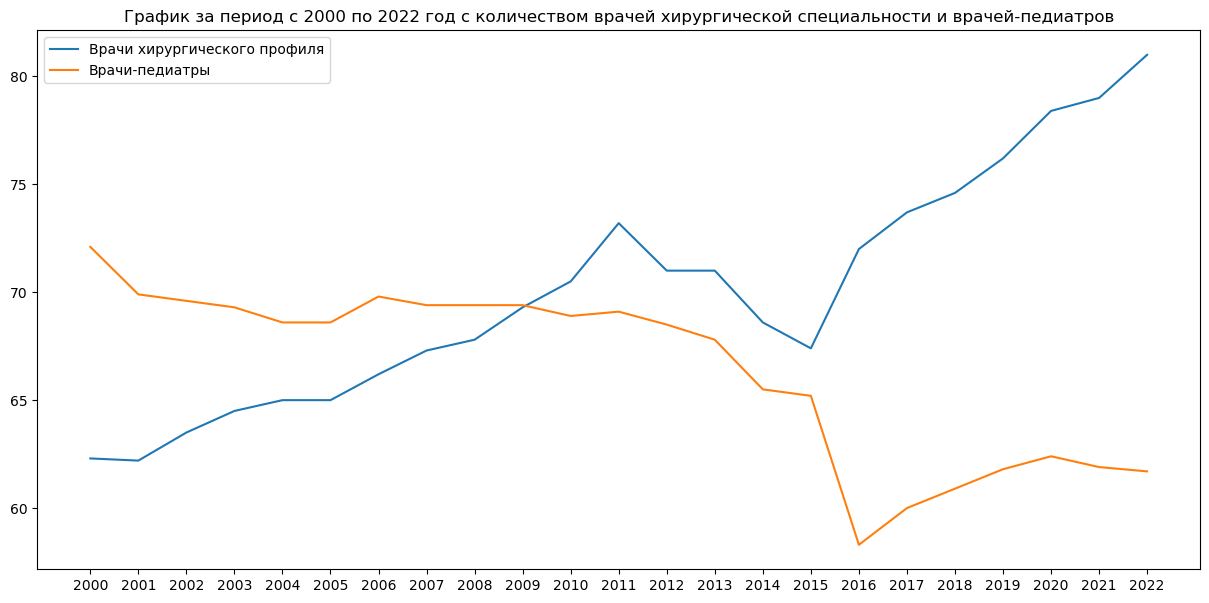

In [69]:
plt.figure(figsize=(15, 7))

# Построим график для врачей хирургического профилия
plt.plot(df_1.columns[1:], list(df_1.iloc[3, 1:]))

# Построим график для врачей- педиатров
plt.plot(df_1.columns[1:], list(df_1.iloc[5, 1:]))

plt.legend(['Врачи хирургического профиля', 'Врачи-педиатры'])
plt.title('График за период с 2000 по 2022 год с количеством врачей хирургической специальности и врачей-педиатров')

plt.show;

**С 2000 года по 2009 год количество педиатров превышало количество хирургов. В 2009 году показатели сравнялись, и затем количество хирургов стало превышать количество педиатров. С 2011 по 2015 годы количество специалистов в обоих профессиях стало снижаться, однако, с 2015 года отмечается существенный рост количества хирургов.**

**ВЫВОД: Таким образом, выдвинутая гипотеза о том, что количество хирургов в стране растёт, а количество педиатров снижается подтверждается.**

# Гипотеза N 3. Сокращается ли число педиатров на 10 тыс детей до 18 лет? 

Для рассмотрения данной гипотезы нам понадобится датафрейм df_2, полученный выше, из объединения отчёта 4.9. "Распределение численности врачей по отдельным специальностям" за различные периоды.

In [70]:
df_2

,"Показатель, тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021.0,2022.0
0,Численность врачей всех специальностей,46.8,46.9,47.4,48.0,48.4,48.8,49.4,49.8,49.6,50.1,50.1,"49,11)","49,11)","48,91)","48,51)","45,9","46,4","47,5","47,9","48,7","50,4",50.50,50.80
1,терапевтов,11.0,10.9,11.0,11.1,11.1,11.3,11.6,11.8,11.8,11.4,11.5,"11,7","11,7","11,7","11,1","10,9","11,1","11,5","11,8","12,0","12,4",12.50,12.60
2,общей практики (семейных),0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.7,"0,7","0,7","0,7","0,7","0,7","0,7","0,8","0,8","0,8","0,8",0.70,0.70
3,хирургов1),4.3,4.3,4.4,4.5,4.6,4.6,4.7,4.7,4.8,4.9,4.9,"5,0","5,0","4,9","4,7","4,6","4,9","5,0","5,1","5,2","5,4",5.40,5.50
4,акушеров-гинекологов,5.4,5.4,5.5,5.6,5.6,5.6,5.7,5.7,5.7,5.7,5.7,"5,7","5,7","5,7","5,5","5,4","5,5","5,6","5,6","5,6","5,6",5.60,5.50
5,педиатров2),28.2,28.7,30.0,31.2,31.9,32.0,33.4,33.3,32.9,32.4,32.2,"25,5","25,5","24,8","23,1","22,5","19,7","20,0","20,2","20,3","20,5",20.40,20.40
6,офтальмологов,1.1,1.1,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.2,"1,2","1,2","1,2","1,2","1,2","1,2","1,2","1,3","1,3","1,3",1.30,1.30
7,отоларингологов,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,"0,9","0,9","0,9","0,9","0,9","0,9","0,9","0,9","0,9","1,0",1.00,1.00
8,неврологов,1.6,1.6,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.9,"1,9","1,9","1,9","1,9","1,9","1,9","1,9","1,9","2,0","2,0",2.00,2.00
9,психиатров и наркологов,1.6,1.6,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,"1,6","1,6","1,6","1,6","1,4","1,5","1,5","1,5","1,5","1,5",1.50,1.50


In [71]:
# Также назовём первый столбец как Показатель c указанием единицы измерения данных (на 10 тыс.человек)
df_2.columns.values[0] = 'Показатель, на 10 тыс.человек'

In [72]:
# изменим название колонок за 2021 и 2022 годы с "2021.0" и "2022.0" на "2021" и "2022",
df_2.rename(columns={2021.0:'2021', 2022.0:'2022'}, inplace = True)

In [73]:
# укажем некоторые наименования специальностей в соответствии с отчётами за последние годы (2021, 2022)
df_2.iloc[1,0] = 'терапевтического профиля (за исключение врачей общей практики (семейных) )'
df_2.iloc[3,0] = 'хирургического профиля'
df_2.iloc[5,0] = 'педиатров'
df_2.iloc[11,0] = 'дерматовенерологов'

In [74]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Показатель, на 10 тыс.человек  16 non-null     object
 1   2000                           16 non-null     object
 2   2001                           16 non-null     object
 3   2002                           16 non-null     object
 4   2003                           16 non-null     object
 5   2004                           16 non-null     object
 6   2005                           16 non-null     object
 7   2006                           16 non-null     object
 8   2007                           16 non-null     object
 9   2008                           16 non-null     object
 10  2009                           16 non-null     object
 11  2010                           16 non-null     object
 12  2011                           16 non-null     object
 13  2012   

In [75]:
# Преобразуем тип данных для колонок с 2000 по 2010 год к float
for elem in list(df_2.columns[1:12]):
    df_2[elem] = df_2[elem].apply(pd.to_numeric).astype(float)

In [76]:
# Заменим , на . в колонках с 2011 по 2020 годы
for elem in list(df_2.columns[12:-2]):
    df_2[elem] = df_2[elem].str.replace(',', '.')

In [77]:
# уберём лишние обозначения в числах в 0 строке в колонках с 2012 по 2015 год
df_2.iloc[0, 12:16] = df_2.iloc[0, 12:16].str.replace('1)', '')

In [78]:
# Преобразуем тип данных для колонок с 2011 по 2022 год к float
for elem in list(df_2.columns[11:]):
    df_2[elem] = df_2[elem].apply(pd.to_numeric).astype(float)

In [79]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Показатель, на 10 тыс.человек  16 non-null     object 
 1   2000                           16 non-null     float64
 2   2001                           16 non-null     float64
 3   2002                           16 non-null     float64
 4   2003                           16 non-null     float64
 5   2004                           16 non-null     float64
 6   2005                           16 non-null     float64
 7   2006                           16 non-null     float64
 8   2007                           16 non-null     float64
 9   2008                           16 non-null     float64
 10  2009                           16 non-null     float64
 11  2010                           16 non-null     float64
 12  2011                           16 non-null     float

In [80]:
# уменьшим число терапевтов на число семейных врачей (т.к. планируем отразить на графиках такую подкатегорию терапевтов 
# как семейные врачи)
df_2.iloc[1, 1:] = df_2.iloc[1, 1:] - df_2.iloc[2, 1:]

In [81]:
# Численность врачей всех специальностей за 2000 год
df_2.iloc[0, 1]

46.8

In [82]:
# Сумма в колонке за 2000 год по всем строкам, за исключением 0 строки - численность врачей по всем специальностям
df_2.iloc[1:, 1].sum()

62.89999999999999

**В таблице df_2 не будем добавлять дополнительную строку "другие неуказанные в отчётах Росстата специальности". Это связано с тем, что показатель на 10 тыс.человек считается от разного числа групп популяции. Например, как следует из пояснений к таблице 4.9 "Распределение численности врачей по отдельным специальностям" за 2021 и 2022 годы: численность акушеров-гинекологов рассчитана на 10 000 женщин, педиатров – на 10 000 детей в возрасте 0 – 14 лет, а с 2015 г. – 0 – 17 лет, врачи хирургического профиля посчитаны без анестезиологов-реаниматологов + есть изначально не выделенные в отчёте специальности (аллергологи, диетологи и т.п.). Кроме того, выше указан расчёт, что для каждого года численность врачей всех специальностей (строка 0) меньше, чем суммирование в каждой колонке всех строк врачебных специальностей.**

In [83]:
df_2

,"Показатель, на 10 тыс.человек",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Численность врачей всех специальностей,46.80,46.90,47.40,48.00,48.40,48.80,49.40,49.80,49.60,50.10,50.10,49.10,49.10,48.90,48.50,45.90,46.40,47.50,47.90,48.70,50.40,50.50,50.80
1,терапевтического профиля (за исключение врачей общей практики (семейных) ),10.90,10.80,10.80,10.90,10.80,11.00,11.20,11.30,11.20,10.70,10.80,11.00,11.00,11.00,10.40,10.20,10.40,10.70,11.00,11.20,11.60,11.80,11.90
2,общей практики (семейных),0.10,0.10,0.20,0.20,0.30,0.30,0.40,0.50,0.60,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.80,0.80,0.80,0.80,0.70,0.70
3,хирургического профиля,4.30,4.30,4.40,4.50,4.60,4.60,4.70,4.70,4.80,4.90,4.90,5.00,5.00,4.90,4.70,4.60,4.90,5.00,5.10,5.20,5.40,5.40,5.50
4,акушеров-гинекологов,5.40,5.40,5.50,5.60,5.60,5.60,5.70,5.70,5.70,5.70,5.70,5.70,5.70,5.70,5.50,5.40,5.50,5.60,5.60,5.60,5.60,5.60,5.50
5,педиатров,28.20,28.70,30.00,31.20,31.90,32.00,33.40,33.30,32.90,32.40,32.20,25.50,25.50,24.80,23.10,22.50,19.70,20.00,20.20,20.30,20.50,20.40,20.40
6,офтальмологов,1.10,1.10,1.10,1.10,1.10,1.10,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.30,1.30,1.30,1.30,1.30
7,отоларингологов,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,1.00,1.00,1.00
8,неврологов,1.60,1.60,1.70,1.70,1.70,1.80,1.80,1.80,1.80,1.80,1.90,1.90,1.90,1.90,1.90,1.90,1.90,1.90,1.90,2.00,2.00,2.00,2.00
9,психиатров и наркологов,1.60,1.60,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.60,1.60,1.60,1.60,1.40,1.50,1.50,1.50,1.50,1.50,1.50,1.50


In [84]:
# Запишем data_new в csv файл
#df_2.to_csv(r'C://Users//Lenovo//OneDrive//Рабочий стол//Мастерская//Обработанный файлы//Специальности_на_10тысяч.csv', index= False)

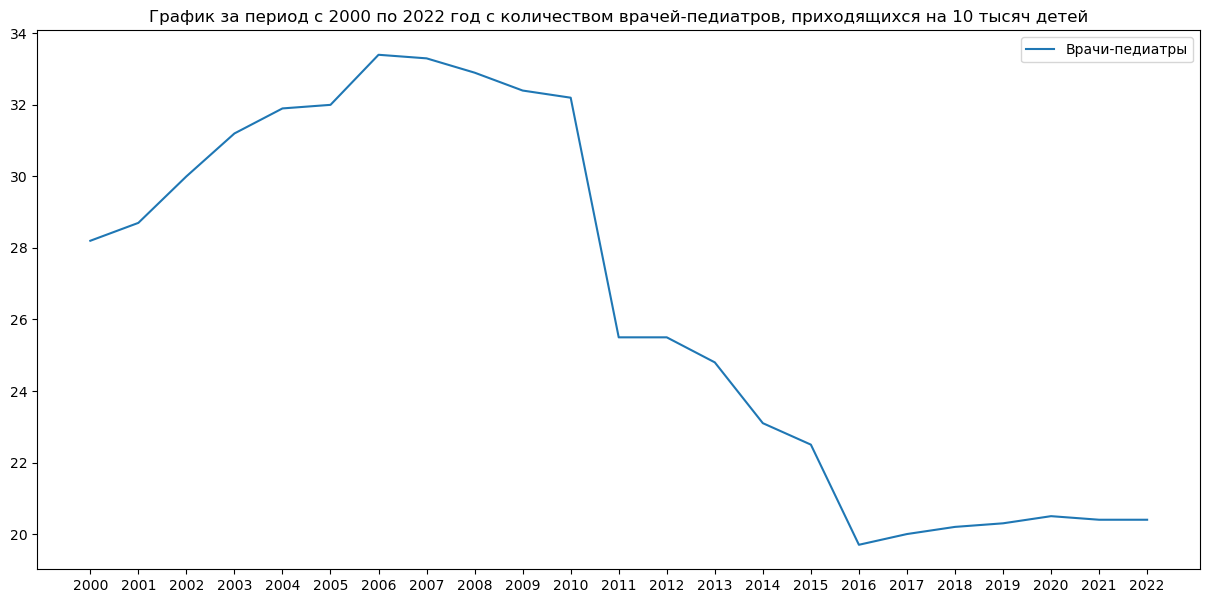

In [85]:
plt.figure(figsize=(15, 7))


# Построим график для врачей- педиатров
plt.plot(df_2.columns[1:], list(df_2.iloc[5, 1:]))

plt.legend(['Врачи-педиатры'])
plt.title('График за период с 2000 по 2022 год с количеством врачей-педиатров, приходящихся на 10 тысяч детей')

plt.show;

**С 2000 года по 2006 год количество педиатров на 10 тысяч детей росло, затем с 2006 по 2010 год постепенно снижалось. В 2010 году произошло резкое сокращение числа педиатров на 10 тысяч детей. И с 2011 года по 2016 год данный покатель снижался. С 2016 года по 2022 год наметилась небольшая динамика увеличения числа педиатров на 10 тысяч детей.**

**ВЫВОД: В целом, выдвинутая гипотеза о том, что количество педиатров на 10 тысяч детей снижается подтверждается.**

# Итоги.

**В исследовании рассматривались следующие гипотезы:**

**ГИПОТЕЗА 1. Подтверждаются ли предположения о том, что за исследуемый период динамика роста средней заработной платы работников здравоохранения составляет порядка 10 %.**

**В ходе проведённого исследования гипотеза N 1 не подтвердилась. Было выявлено, что за исследуемый период с 2001 по 2023 год динамика роста средней заработной платы работников здравоохранения составила более 10 %.**

**ГИПОТЕЗА 2. Подтверждаются ли предположения о том, что количество хирургов в стране растёт, а количество педиатров снижается.**

**В ходе проведённого исследования гипотеза N 2 подтвердилась. За исследуемый период количество педиатров в России сократилось, а количество хирургов выросло.**

**ГИПОТЕЗА 3. Сокращается ли число педиатров на 10 тысяч детей до 18 лет?**

**В ходе проведённого исследования гипотеза N 3 подтвердилась. За исследумый период количество педиатров в России на 10 тысяч детей снизилось.**